In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [211]:
# Load WineRed Quality dataset
w_d = pd.read_csv('/Users/mohithsainattam/Downloads/datasets/winequality-red.csv')
print("Main Statistics of Wine Quality Dataset:")
print(w_d.describe())

Main Statistics of Wine Quality Dataset:
       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min    

In [212]:
print("\nFirst 5 rows of the dataset:")
print(w_d.head())


First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8  

In [213]:
# Calculate sum of missing entries
missing_values = w_d.isnull().sum(axis=0)
print("\nSum of Missing Entries:")
print(missing_values)


Sum of Missing Entries:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


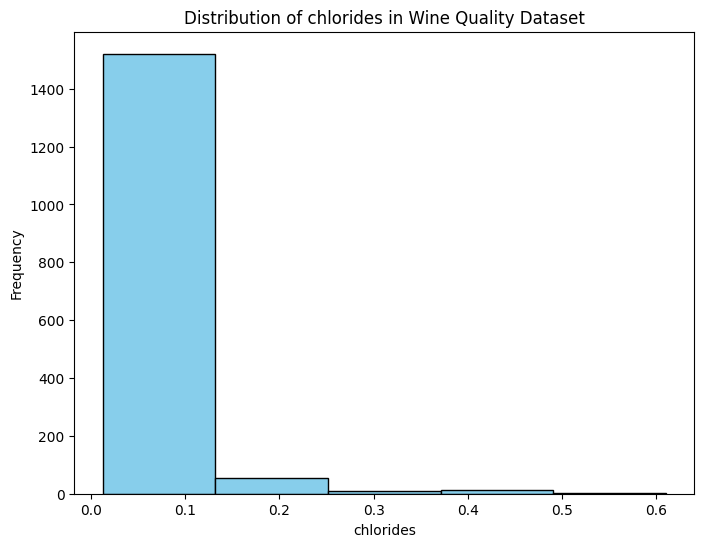

In [214]:
plt.figure(figsize=(8, 6))
plt.hist(w_d['chlorides'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('chlorides')
plt.ylabel('Frequency')
plt.title('Distribution of chlorides in Wine Quality Dataset')
plt.show()

In [215]:
#Linear Regression on Wine Quality dataset
X = w_d[['fixed acidity','volatile acidity','citric acid','residual sugar','quality','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'
]]
y = w_d['chlorides']

In [216]:
N, d = X.shape  # N is the number of samples, d is the number of features

tr_size = int(0.8 * N)
X_train, X_test = X[:tr_size], X[tr_size:]
y_train, y_test = y[:tr_size], y[tr_size:]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1279, 11)
y_train shape: (1279,)
X_test shape: (320, 11)
y_test shape: (320,)


In [217]:
# closed-form solution to solve linear regression
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y_train)
print(w)

[-7.58350030e+00 -1.91723099e-02  5.83535168e-02  9.52861073e-02
 -2.75386208e-03 -6.37196248e-03  3.77023239e-04 -3.07983362e-04
  8.19724083e+00 -1.21579112e-01  9.88022788e-02 -5.90339569e-04]


In [218]:
# calculate MSE on testing data
y_prediction_train = np.dot(X_train, w)
mse = np.mean((y_train - y_prediction_train)**2)
print(f"Mean Squared Error on Training Set: {mse}")

Mean Squared Error on Training Set: 0.0015063079848283323


In [219]:
#Get predictions and calculate MSE on testing data
y_prediction = np.dot(X_test, w)
mse = np.mean((y_test - y_prediction)**2)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 0.0014694309988374913


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


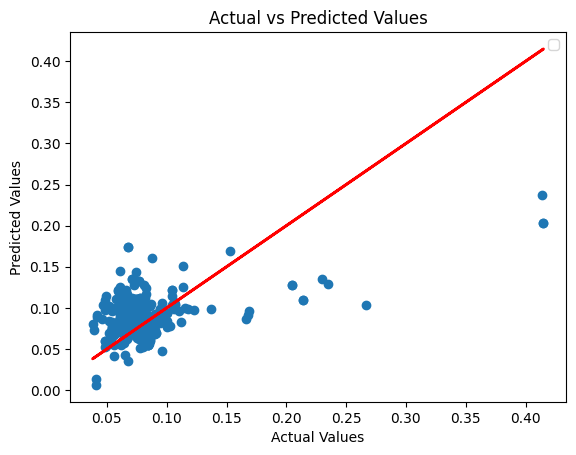

In [209]:
#Plot predictions vs actual values
plt.scatter(y_test, y_prediction)
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [221]:
# Load penguins dataset
p_data = pd.read_csv('/Users/mohithsainattam/Downloads/datasets/penguins.csv')

# Extract main statistics
print("Main Statistics of penguins Dataset:")
print(p_data.describe())
print("\nFirst 5 rows of the dataset:")
print(p_data.head())

Main Statistics of penguins Dataset:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g   
count      342.000000     342.000000         342.000000   342.000000  \
mean        43.921930      17.151170         200.915205  4201.754386   
std          5.459584       1.974793          14.061714   801.954536   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.225000      15.600000         190.000000  3550.000000   
50%         44.450000      17.300000         197.000000  4050.000000   
75%         48.500000      18.700000         213.000000  4750.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   344.000000  
mean   2008.029070  
std       0.818356  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  

First 5 rows of the dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0  Adelie  Torgersen 

In [222]:
# Calculate sum of missing entries
missing_values = p_data.isnull().sum(axis=0)
print("\nSum of Missing Entries:")
print(missing_values)


Sum of Missing Entries:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [223]:
#filling the missing values with most frequent values using mode
p_data.fillna(p_data.mode().iloc[0], inplace=True)

In [224]:
missing_values = p_data.isnull().sum(axis=0)
print("\nSum of Missing Entries:")
print(missing_values)


Sum of Missing Entries:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [225]:
def encoding(category_list):
    cs = list(set(category_list))
    numeric_data = {category: i for i, category in enumerate(cs)}
    numerical_list = [numeric_data[category] for category in category_list]
    return numerical_list

p_data['species'] = encoding(p_data['species'])
p_data['island']= encoding(p_data['island'])
p_data['sex'] = encoding(p_data['sex'])

In [226]:
p_data['species'].value_counts()

species
1    152
0    124
2     68
Name: count, dtype: int64

In [227]:
p_data['island'].value_counts()

island
2    168
0    124
1     52
Name: count, dtype: int64

In [228]:
p_data['sex'].value_counts()

sex
1    179
0    165
Name: count, dtype: int64

In [229]:
print(p_data.head())

   species  island  bill_length_mm  bill_depth_mm  flipper_length_mm   
0        1       1            39.1           18.7              181.0  \
1        1       1            39.5           17.4              186.0   
2        1       1            40.3           18.0              195.0   
3        1       1            41.1           17.0              190.0   
4        1       1            36.7           19.3              193.0   

   body_mass_g  sex  year  
0       3750.0    1  2007  
1       3800.0    0  2007  
2       3250.0    0  2007  
3       3800.0    1  2007  
4       3450.0    0  2007  


In [230]:
#Logistic Regression on Penguins dataset

# Choose features and target
X = p_data[['species','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = p_data['sex']

# standardize features
def standardize_features(X):
    mean = np.mean(X, axis=0)
    standard_dev = np.std(X, axis=0)
    standardized_X = (X - mean) / standard_dev
    return standardized_X

X = standardize_features(X)

# Split the dataset into training and test sets
splitting_ratio = 0.8
splitting_index = int(len(X) * splitting_ratio)
X_train, X_test = X[:splitting_index], X[splitting_index:]
y_train, y_test = y[:splitting_index], y[splitting_index:]

print(X)
print("\nShapes of Training and Test Sets:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

      species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0    0.223265       -0.883375       0.788176          -1.415471    -0.562452
1    0.223265       -0.809845       0.127001          -1.058960    -0.499877
2    0.223265       -0.662785       0.432159          -0.417242    -1.188208
3    0.223265       -0.515725      -0.076437          -0.773752    -0.499877
4    0.223265       -1.324555       1.093334          -0.559846    -0.937906
..        ...             ...            ...                ...          ...
339  1.594752        2.186502       1.347632           0.438383    -0.249575
340  1.594752       -0.074545       0.483018           0.081873    -1.000481
341  1.594752        1.046787       0.533878          -0.559846    -0.531165
342  1.594752        1.267377       0.940755           0.652290    -0.124423
343  1.594752        1.157082       0.788176          -0.203335    -0.531165

[344 rows x 5 columns]

Shapes of Training and Test Sets:
X_train: (275, 5)

In [231]:
# Logistic Regression Class
class LogisticRegression:
    def __init__(self, learn_rate, iterations):
        self.learn_rate = learn_rate
        self.iterations = iterations
        self.loss = []
        

    def sigmoid(self, linear_pred):
        e = np.exp(-linear_pred)
        sig =  1 / (1 + e)
        return sig

    def cost(self, y_pred, y):
        c =(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()
        return c

    def gradient_descent(self, X, y_pred, y):
        grad_desc = np.dot(X.T, (y_pred - y)) / y.shape[0]
        return grad_desc

    def fit(self, X, y):
        self.weight_vector = np.random.uniform(0, 1, X.shape[1])
        for i in range(self.iterations):
            linear_pred = np.dot(X, self.weight_vector)
            y_pred = self.sigmoid(linear_pred)
            gradient = self.gradient_descent(X, y_pred, y)
            self.weight_vector -= self.learn_rate * gradient
            loss = (-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean()
            self.loss.append(loss)
            if i % 10000 == 0:
                print(f'Iteration {i}, Cost: {self.cost(y_pred, y)}')

    def predict(self, X):
        print(self.weight_vector)
        pred = np.round(self.sigmoid(np.dot(X, self.weight_vector)))
        return pred

1st Hyperparameter Tuning

In [238]:
# Train the Logistic Regression model
model = LogisticRegression(learn_rate=1e-6, iterations=80000)
model.fit(X_train, y_train)

Iteration 0, Cost: 0.5148869775915572
Iteration 10000, Cost: 0.5140067989909756
Iteration 20000, Cost: 0.5131385698848558
Iteration 30000, Cost: 0.5122820875181228
Iteration 40000, Cost: 0.5114371525361108
Iteration 50000, Cost: 0.5106035689379044
Iteration 60000, Cost: 0.5097811440297453
Iteration 70000, Cost: 0.5089696883785636


In [239]:
# Make predictions on train data
training_pred = model.predict(X_train)

[0.08703479 0.11582018 0.88732774 0.11471935 0.37089616]


In [240]:
# Make predictions on test data
testing_pred = model.predict(X_test)

[0.08703479 0.11582018 0.88732774 0.11471935 0.37089616]


In [241]:
# Calculate accuracy on train data
training_acc = np.mean(training_pred == y_train)*100
print("\nTrain Accuracy:", training_acc)


Train Accuracy: 80.0


In [242]:
# Calculate accuracy on test data
testing_acc = np.mean(testing_pred == y_test)*100
print("\nTest Accuracy:", testing_acc)


Test Accuracy: 72.46376811594203


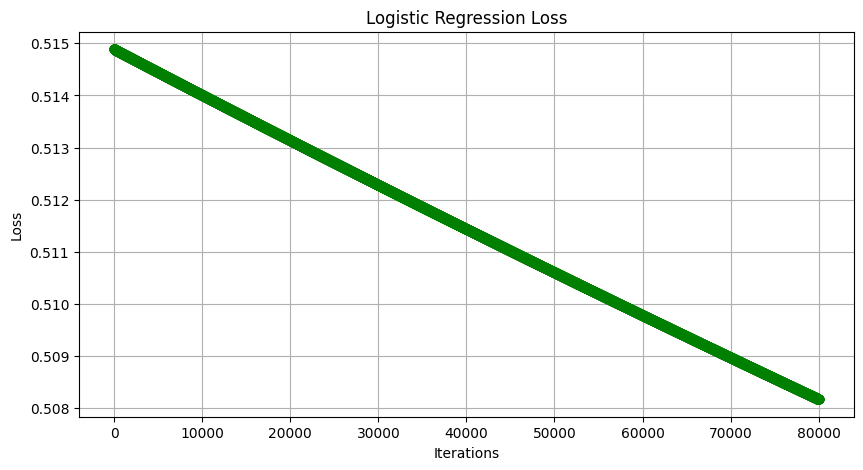

In [244]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(model.loss)),model.loss, marker='o', color='green', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss')
plt.grid(True)
plt.show()

2nd Hyperparameter Tuning

In [174]:
# Train the Logistic Regression model
model = LogisticRegression(learn_rate=1e-2, iterations=100000)
model.fit(X_train, y_train)

Iteration 0, Cost: 0.4841549380014571
Iteration 10000, Cost: 0.3136833037516236
Iteration 20000, Cost: 0.3080933836049329
Iteration 30000, Cost: 0.3071065256387115
Iteration 40000, Cost: 0.3068711373929355
Iteration 50000, Cost: 0.3068050968173455
Iteration 60000, Cost: 0.3067847065939833
Iteration 70000, Cost: 0.30677805869331015
Iteration 80000, Cost: 0.30677582600591446
Iteration 90000, Cost: 0.306775064293146


In [175]:
# Make predictions on train data
training_pred = model.predict(X_train)

[-1.20388203  0.90252087  3.37103462 -0.8333548   2.81676156]


In [176]:
# Make predictions on test data
testing_pred = model.predict(X_test)

[-1.20388203  0.90252087  3.37103462 -0.8333548   2.81676156]


In [177]:
# Calculate accuracy on training data
training_acc = np.mean(training_pred == y_train)*100
print("\nTrain Accuracy:", training_acc)


Train Accuracy: 88.0


In [178]:
# Calculate accuracy on test data
testing_acc = np.mean(testing_pred == y_test)*100
print("\nTest Accuracy:", testing_acc)


Test Accuracy: 85.5072463768116


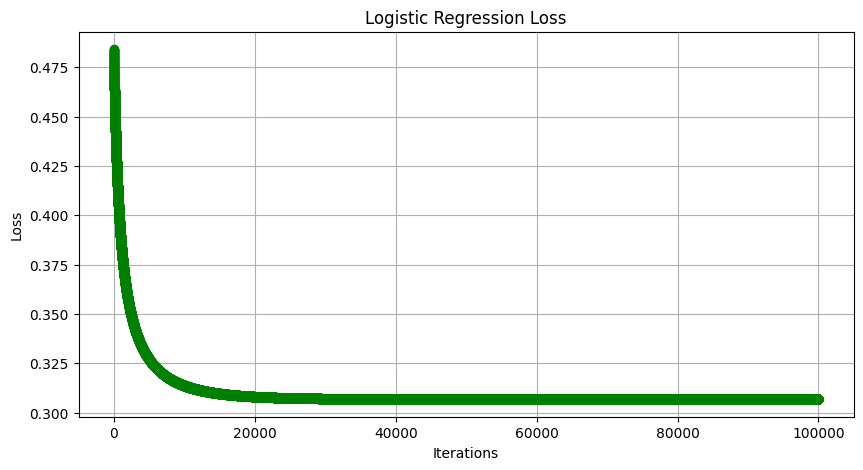

In [179]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(model.loss)),model.loss, marker='o', color='green', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss')
plt.grid(True)
plt.show()

3rd HyperParameter Tuning:

In [180]:
# Train the Logistic Regression model
model = LogisticRegression(learn_rate=0.001, iterations=100000)
model.fit(X_train, y_train)

Iteration 0, Cost: 0.6139460146756451
Iteration 10000, Cost: 0.4036971630647466
Iteration 20000, Cost: 0.36401416951237947
Iteration 30000, Cost: 0.345137756511159
Iteration 40000, Cost: 0.3342546990647163
Iteration 50000, Cost: 0.32729297712969646
Iteration 60000, Cost: 0.32253923134072177
Iteration 70000, Cost: 0.31914363573658483
Iteration 80000, Cost: 0.3166367209041756
Iteration 90000, Cost: 0.31473858912141045


In [181]:
# Make predictions on train data
training_pred = model.predict(X_train)

[-0.47670883  0.57387737  2.77560303 -0.21783346  2.35706438]


In [182]:
# Make predictions on test data
testing_pred = model.predict(X_test)

[-0.47670883  0.57387737  2.77560303 -0.21783346  2.35706438]


In [183]:
# Calculate accuracy on training data
training_acc = np.mean(training_pred == y_train)*100
print("\nTrain Accuracy:", training_acc)


Train Accuracy: 87.63636363636364


In [184]:
# Calculate accuracy on test data
testing_acc = np.mean(testing_pred == y_test)*100
print("\nTest Accuracy:", testing_acc)


Test Accuracy: 89.85507246376811


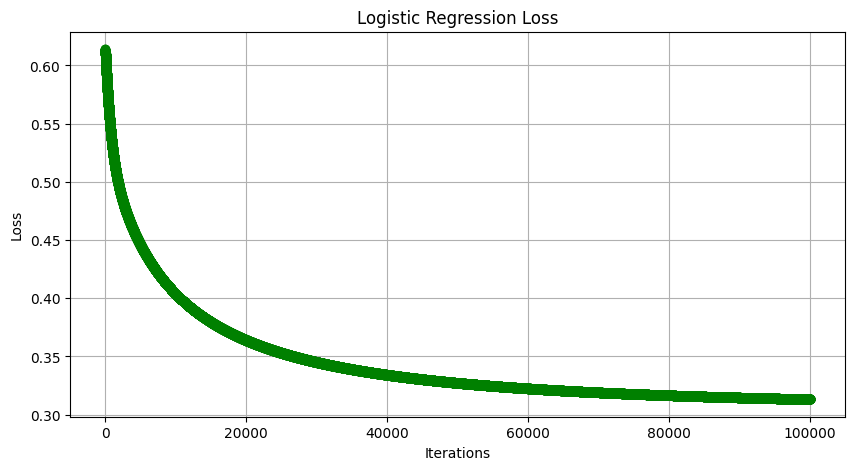

In [185]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(model.loss)),model.loss, marker='o', color='green', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss')
plt.grid(True)
plt.show()